In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# Ejercicio 3
Hacé un gráfico de barras que muestre la cantidad de países hay en cada continente según los datos de gapminder (recordar el ejercicio 10 de la Prctica 2 para acceder a los datos de gapminder).

In [2]:
from gapminder import gapminder 
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
paises = gapminder.groupby("continent").nunique()
print(paises)

           country  year  lifeExp  pop  gdpPercap
continent                                        
Africa          52    12      619  624        624
Americas        25    12      299  300        300
Asia            33    12      393  396        396
Europe          30    12      326  360        360
Oceania          2    12       24   24         24


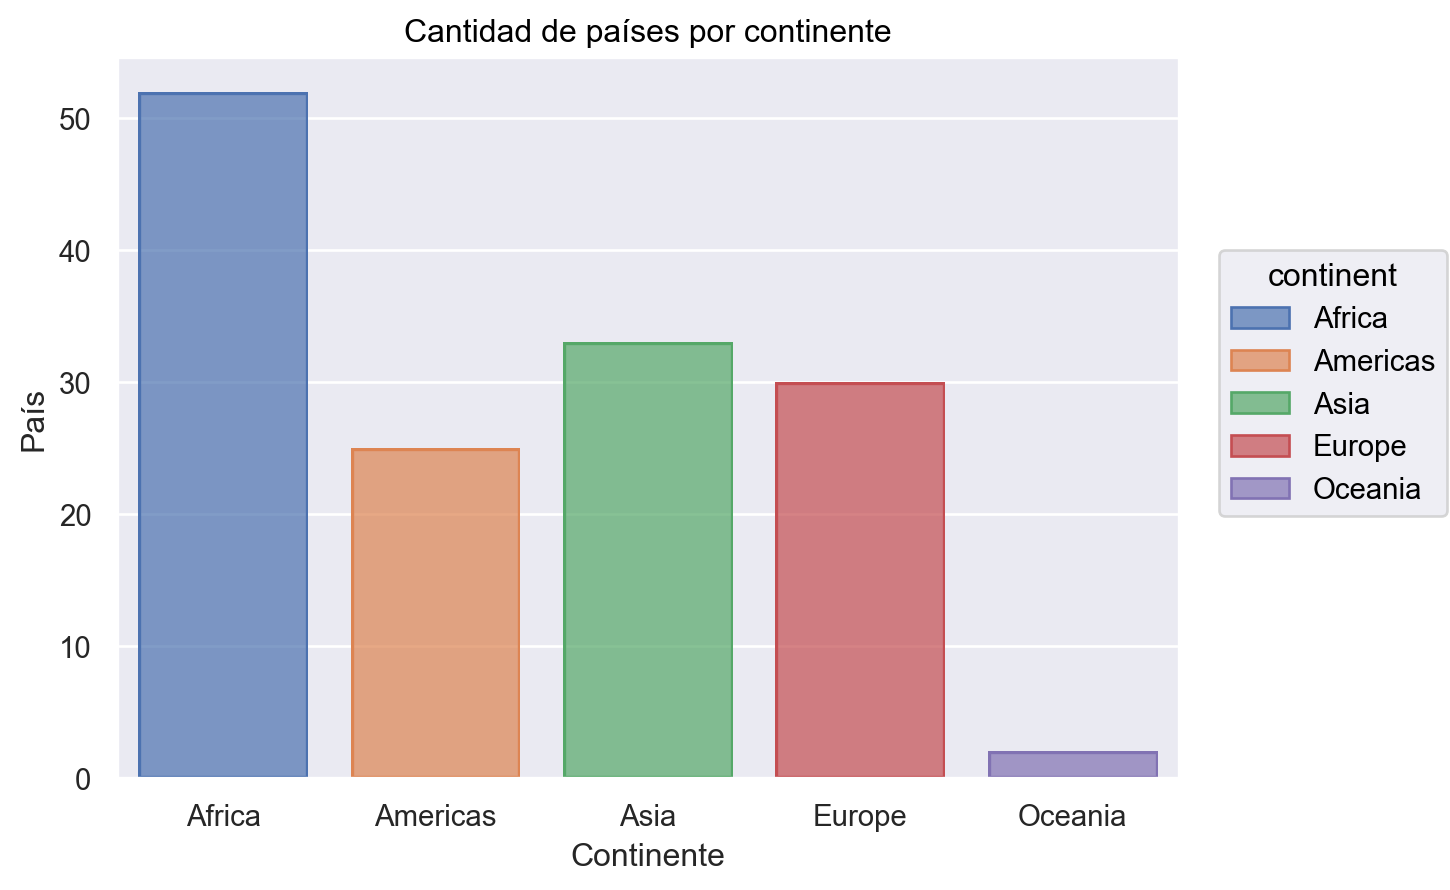

In [200]:
(
    so.Plot(paises,"continent","country", color ="continent")
    .add(so.Bar())
).label(title = "Cantidad de países por continente",legend = "Continente",x = "Continente",y = "País")


## Ejercicio 4
a)Utilizando seaborn.objects, graficar la curva de la expectativa de vida en Argentina en función del año, completando el siguiente código. Sugerencia: recordar de la práctica anterior como filtrar datos de un dataset.

In [5]:
lifeExpArg = gapminder[gapminder.country == "Argentina"]
print(lifeExpArg)

      country continent  year  lifeExp       pop     gdpPercap
48  Argentina  Americas  1952   62.485  17876956   5911.315053
49  Argentina  Americas  1957   64.399  19610538   6856.856212
50  Argentina  Americas  1962   65.142  21283783   7133.166023
51  Argentina  Americas  1967   65.634  22934225   8052.953021
52  Argentina  Americas  1972   67.065  24779799   9443.038526
53  Argentina  Americas  1977   68.481  26983828  10079.026740
54  Argentina  Americas  1982   69.942  29341374   8997.897412
55  Argentina  Americas  1987   70.774  31620918   9139.671389
56  Argentina  Americas  1992   71.868  33958947   9308.418710
57  Argentina  Americas  1997   73.275  36203463  10967.281950
58  Argentina  Americas  2002   74.340  38331121   8797.640716
59  Argentina  Americas  2007   75.320  40301927  12779.379640


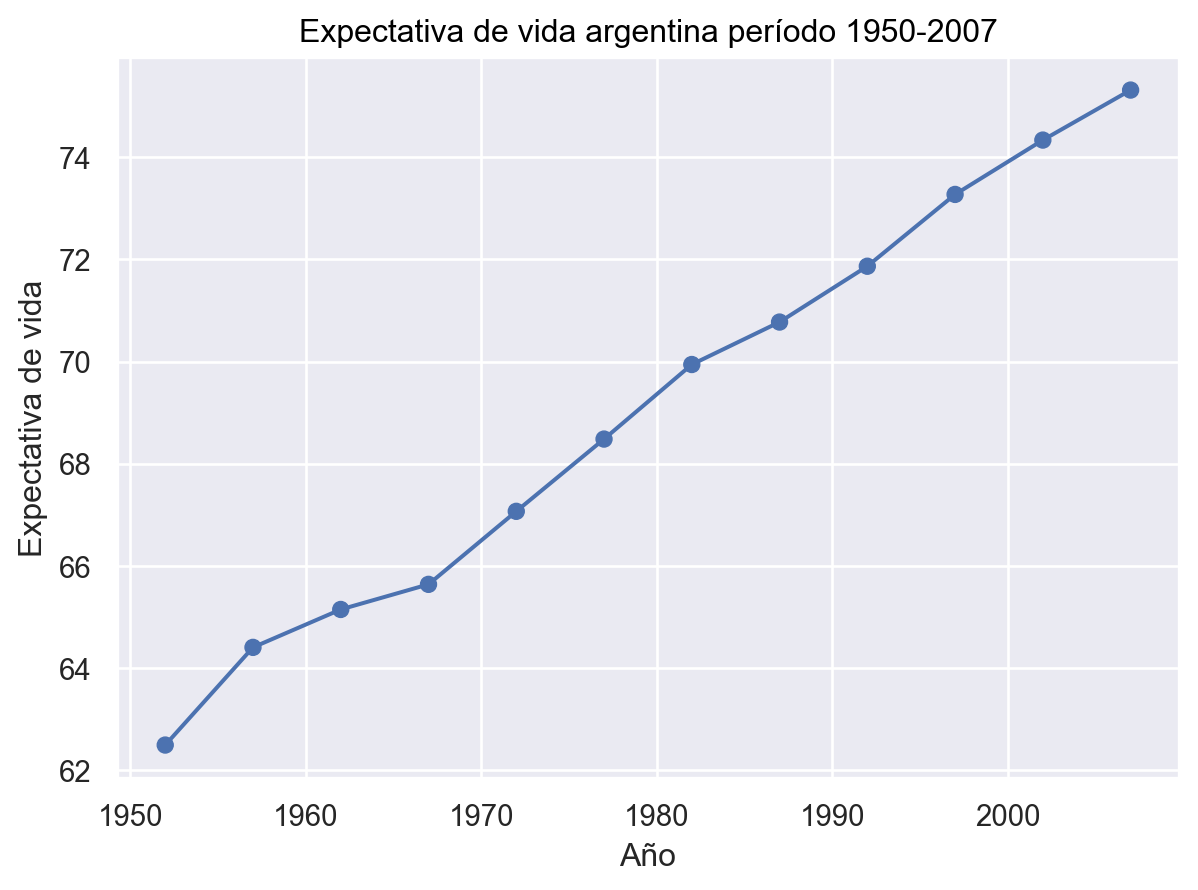

In [201]:
(
    so.Plot(lifeExpArg, "year","lifeExp")
    .add(so.Line())
    .add(so.Dot())
).label(title = "Expectativa de vida argentina período 1950-2007", x ="Año", y ="Expectativa de vida")

#### b)
Realizar un nuevo gráfico donde puedan verse las curvas de la expectativa de vida de los países de América en función del año, una curva por cada país.
Sugerencia: utilizar los parámetros group = ??? o color = ???. ¿Cuál es la diferencia entre los dos?

In [7]:
america = gapminder[gapminder.continent == "Americas"]
print(america)

        country continent  year  lifeExp       pop     gdpPercap
48    Argentina  Americas  1952   62.485  17876956   5911.315053
49    Argentina  Americas  1957   64.399  19610538   6856.856212
50    Argentina  Americas  1962   65.142  21283783   7133.166023
51    Argentina  Americas  1967   65.634  22934225   8052.953021
52    Argentina  Americas  1972   67.065  24779799   9443.038526
...         ...       ...   ...      ...       ...           ...
1639  Venezuela  Americas  1987   70.190  17910182   9883.584648
1640  Venezuela  Americas  1992   71.150  20265563  10733.926310
1641  Venezuela  Americas  1997   72.146  22374398  10165.495180
1642  Venezuela  Americas  2002   72.766  24287670   8605.047831
1643  Venezuela  Americas  2007   73.747  26084662  11415.805690

[300 rows x 6 columns]


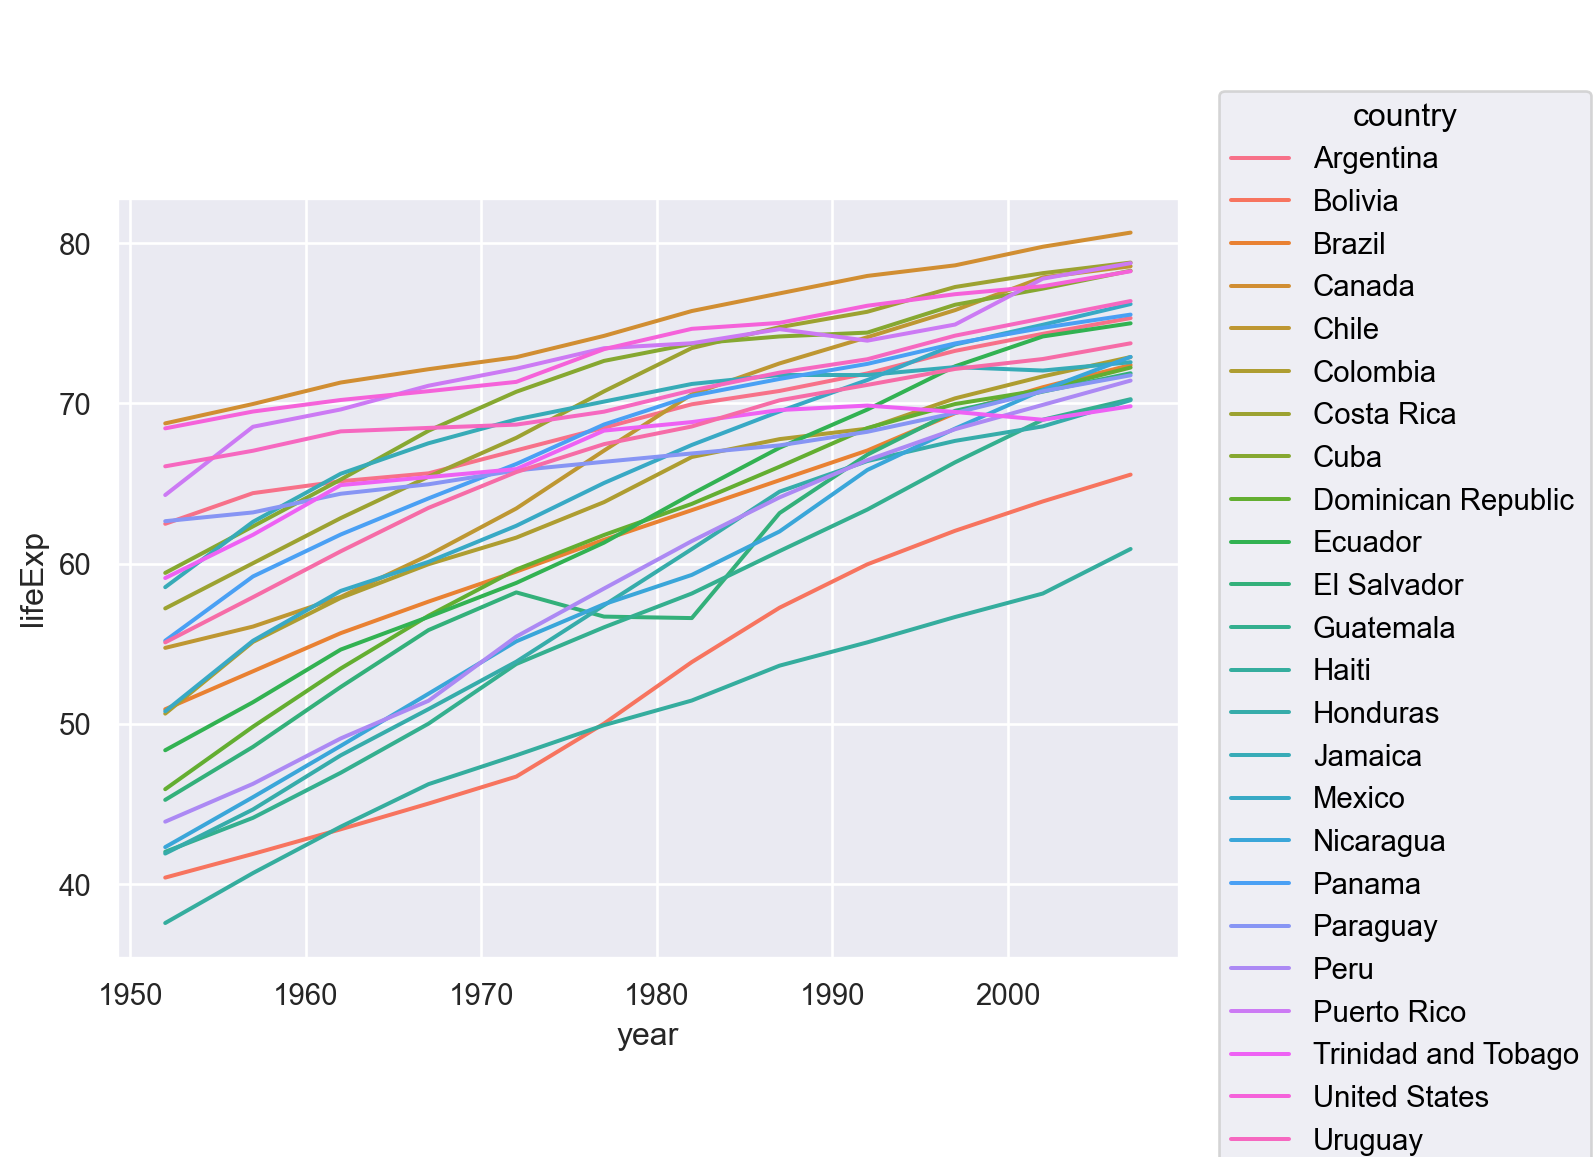

In [212]:
(
    so.Plot(america,"year","lifeExp", color="country")
    .add(so.Line())
)
#usando color para que tome la exp de vida de cada pais y traze una línea para cada uno 

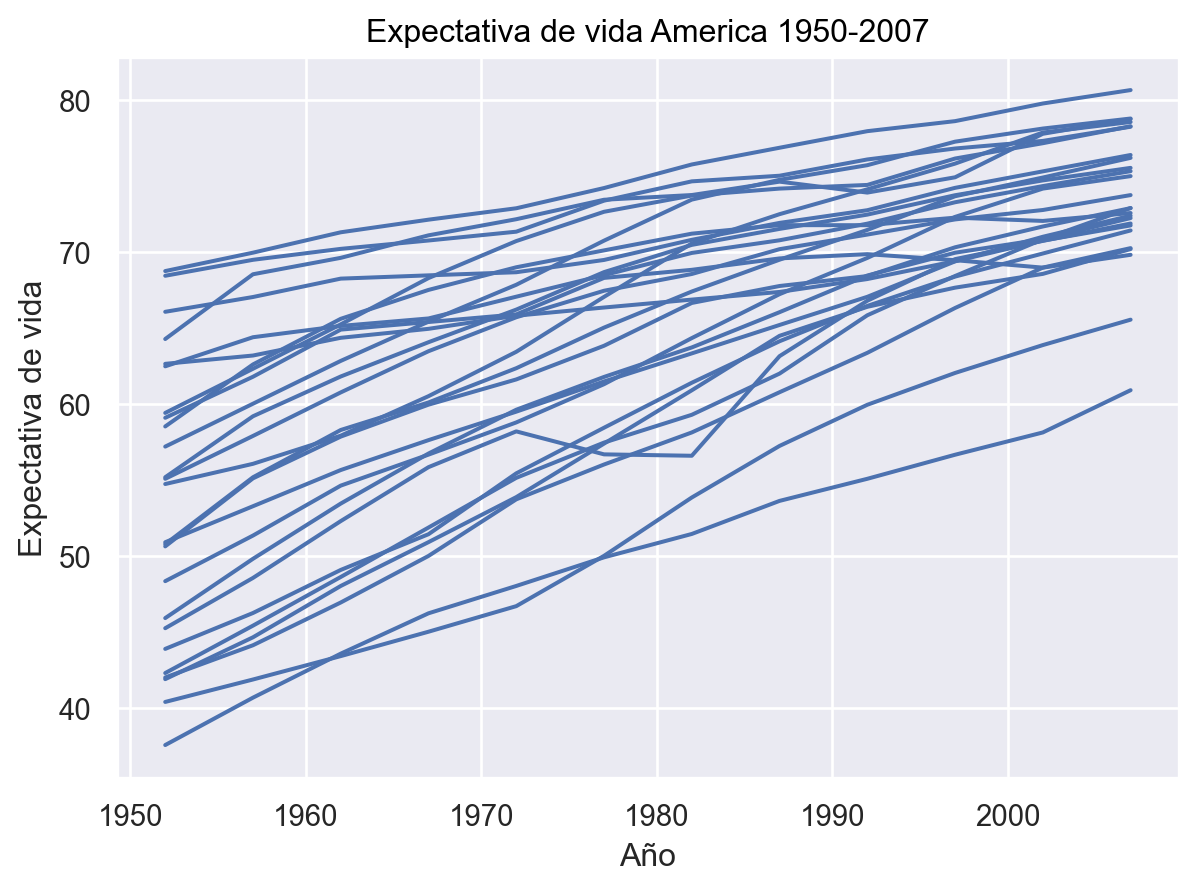

In [214]:
(
    so.Plot(america,"year","lifeExp", group="country")
    .add(so.Line())
).label(title = "Expectativa de vida America 1950-2007", x = "Año", y="Expectativa de vida")
#hace lo mismo que color, relaciona año, lifeExp con la variable de cada pais, pero sin diferenciarlo con colores

### c)
Queremos agregar al gráfico del  ítem anterior una curva de tendencia lineal utilizando el método .add(so.Line(), so.PolyFit(1)). ¿Cuál de las siguientes dos formas de agrupar los datos es la forma correcta? Explicar la diferencia entre los dos códigos.

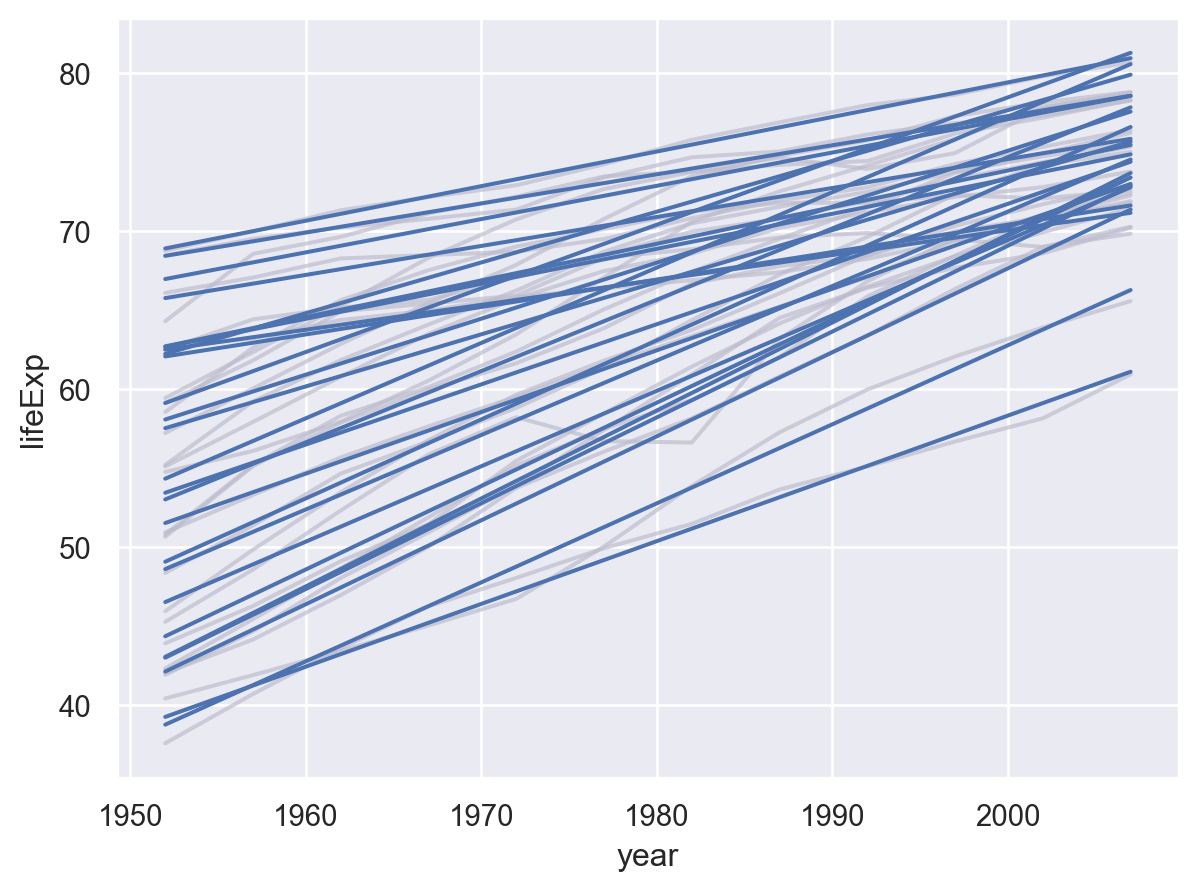

In [10]:
(
    so.Plot(america,"year","lifeExp", group="country")
    .add(so.Line(color = "#bbca"))
    .add(so.Line(), so.PolyFit(1))
)#de esta forma calcula la regresión de la exp de vida de cada pais, ya que agrupa por pais para cada marca después

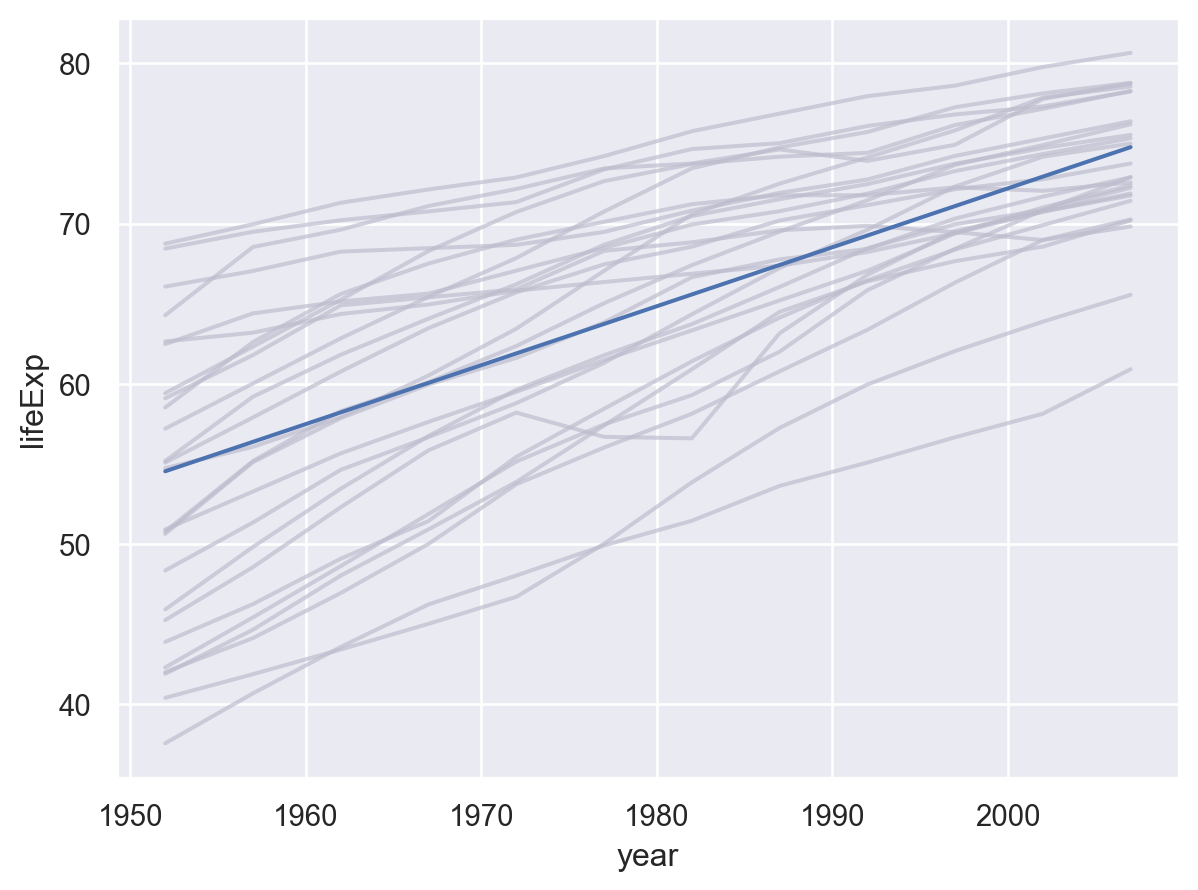

In [11]:
(
    so.Plot(america,"year","lifeExp")
    .add(so.Line(color = "#bbca"), group="country")
    .add(so.Line(), so.PolyFit(1))
)#de esta forma en cambio, calcula la regresión de todas las exp de vida de todos los países del continente.

### d)
Realizar el siguiente gráfico, con las curvas de expectativa de vida agrupadas por continente. Sugerencias: ¿qué hace el método facet() de seaborn.objects.Plot()? ¿Y el parámetro wrap = ??? de facet()?


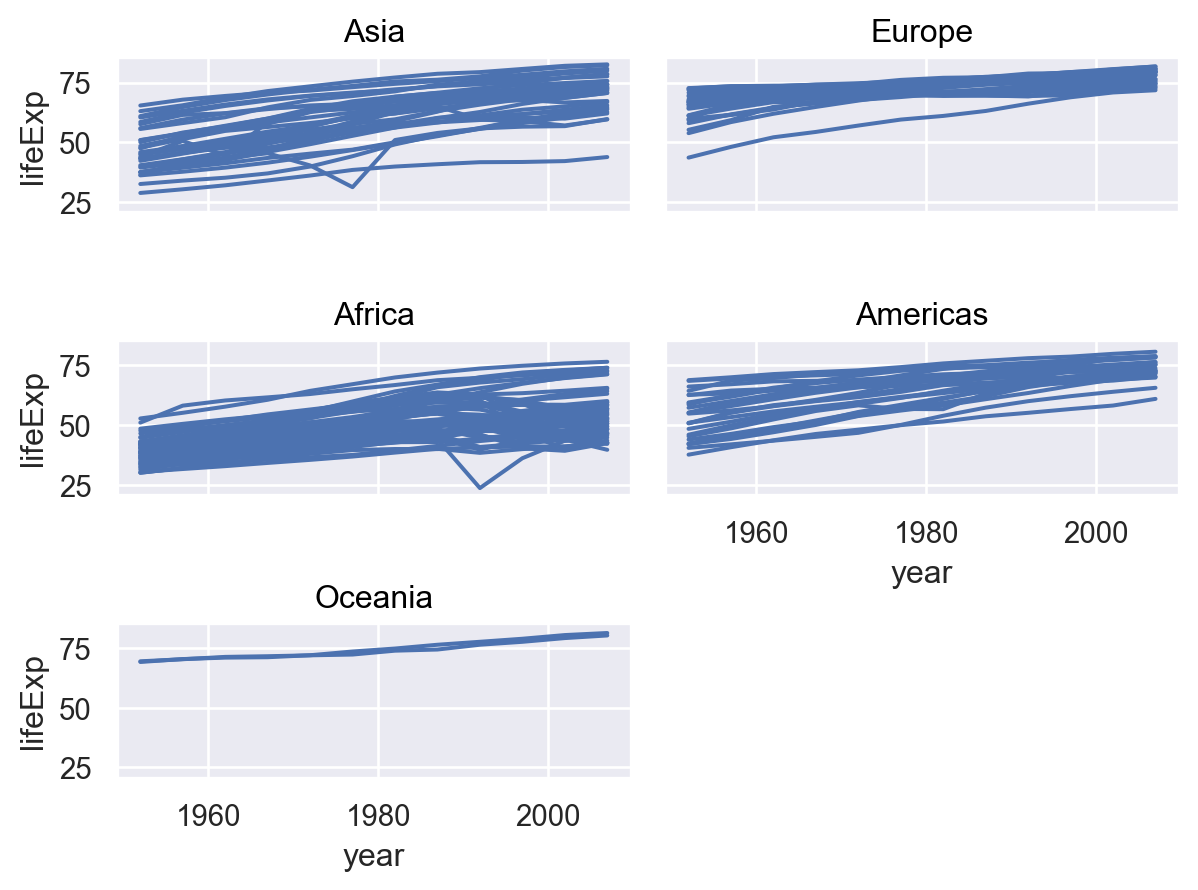

In [12]:
expVidaCont = (so.Plot(gapminder,"year","lifeExp", group = "country")).add(so.Line())
expVidaCont.facet("continent",wrap=2)

## Ejercicio 6
(De acá en adelante, trabajar con el dataset penguins disponible en la biblioteca seaborn). ¿Cuántas filas y columnas hay en el dataset penguins?

In [13]:
penguins = sns.load_dataset("penguins")

In [14]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [18]:
print(f"La cantidad de columnas es: {penguins.shape[1]}")
print(f"La cantidad de filas es: {penguins.shape[0]}")

La cantidad de columnas es: 7
La cantidad de filas es: 344


### Ejercicio 7
¿Qué resultado esperan para el siguiente grafico? ¿Cuales codificaciones se pasan de Plot() a Dot() y cuales no pueden pasarse? ¿Cuáles codificaciones se establecen en Dot()? ¿Cuáles variables están asignadas directamente en Dot()? ¿De qué color van a pintarse los puntos?

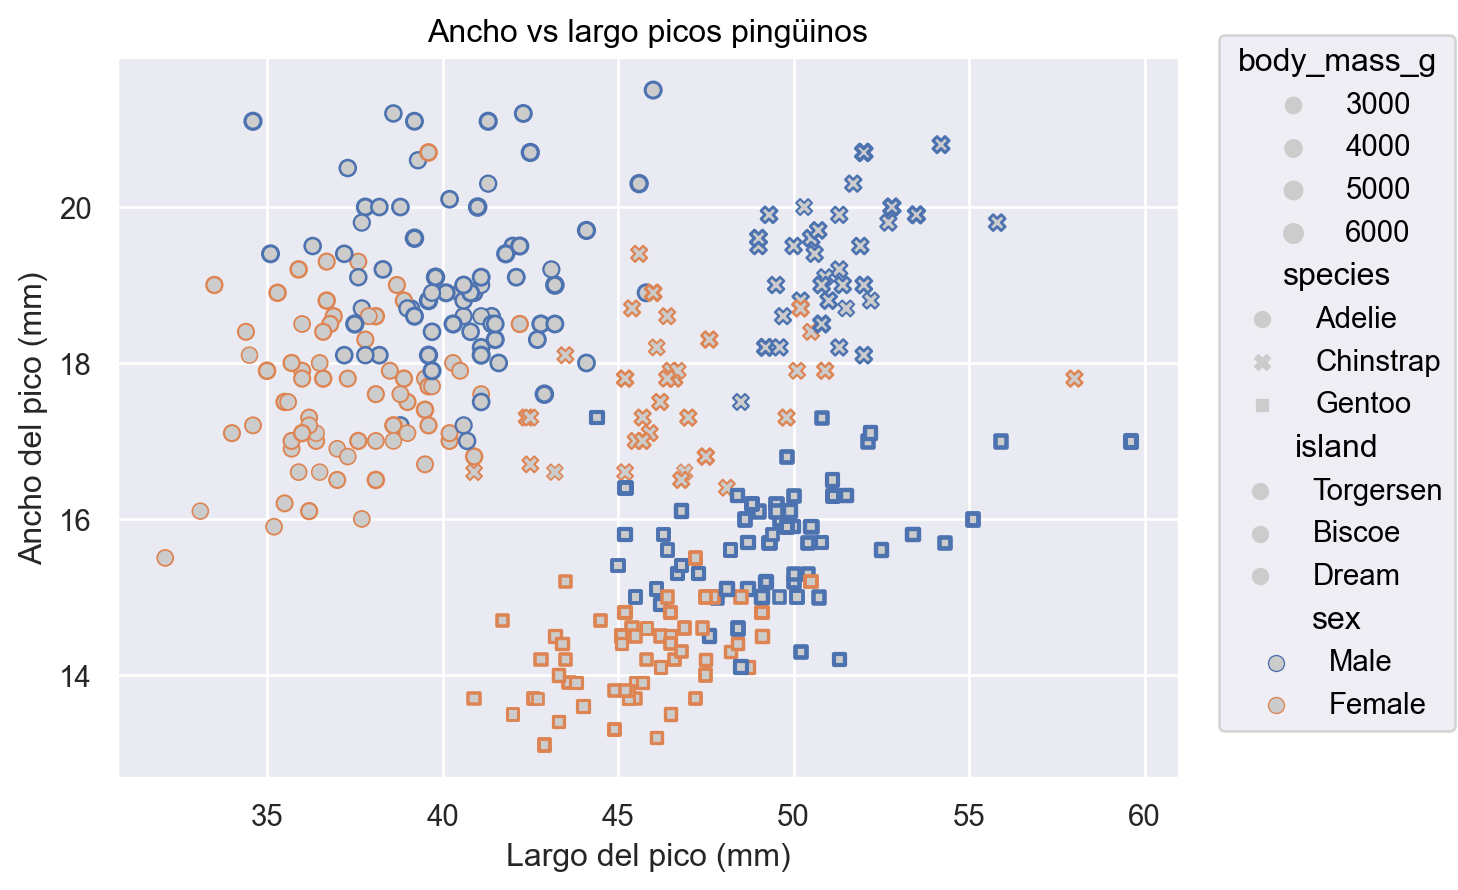

In [215]:
(
so.Plot(
penguins, x = "bill_length_mm",y = "bill_depth_mm",edgewidth = "body_mass_g" , marker = "species",linestyle = "island",
    color = "species")
.add(so.Dot(color = ".8"),edgecolor = "sex")
).label(title = "Ancho vs largo picos pingüinos", x ="Largo del pico (mm)",y="Ancho del pico (mm)")

### Ejercicio 8
(a) ¿Cuántos pinguinos hay en cada isla en la base de datos? Recordar los comandos groupby () y size() de la práctica anterior.
(b) Realizar un grafico de barras con la cantidad de pingu ̈nos en cada isla, completando el siguiente código.


In [35]:
#a)
ping_x_isla = (penguins.groupby(["island"], dropna = False))["species"].count()
print(ping_x_isla)

island
Biscoe       168
Dream        124
Torgersen     52
Name: species, dtype: int64


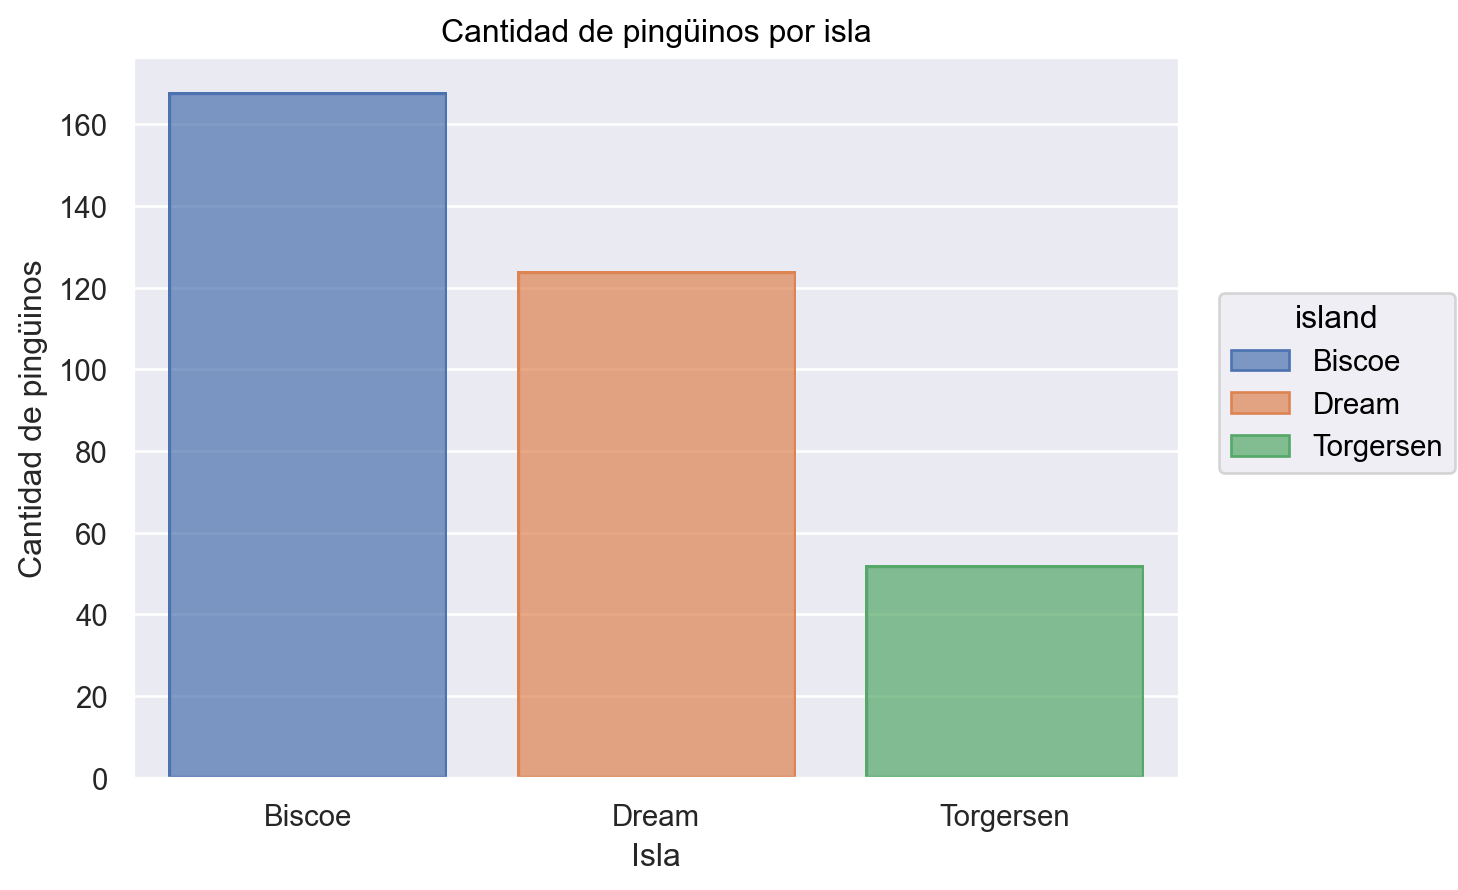

In [218]:
#b)
(
    so.Plot(ping_x_isla.index,ping_x_isla, color = ping_x_isla.index)
    .add(so.Bar())
).label(title="Cantidad de pingüinos por isla",x="Isla", y="Cantidad de pingüinos",legend="Isla")


c) El gráfico que acabamos de hacer es un histograma categórico (usamos una variable categórica en el eje X). Podemos realizar el mismo gráfico usando la función Hist() para contar automáticamente las cantidades (sin definir una variable pinguinos_por_isla. Completar el siguiente código.

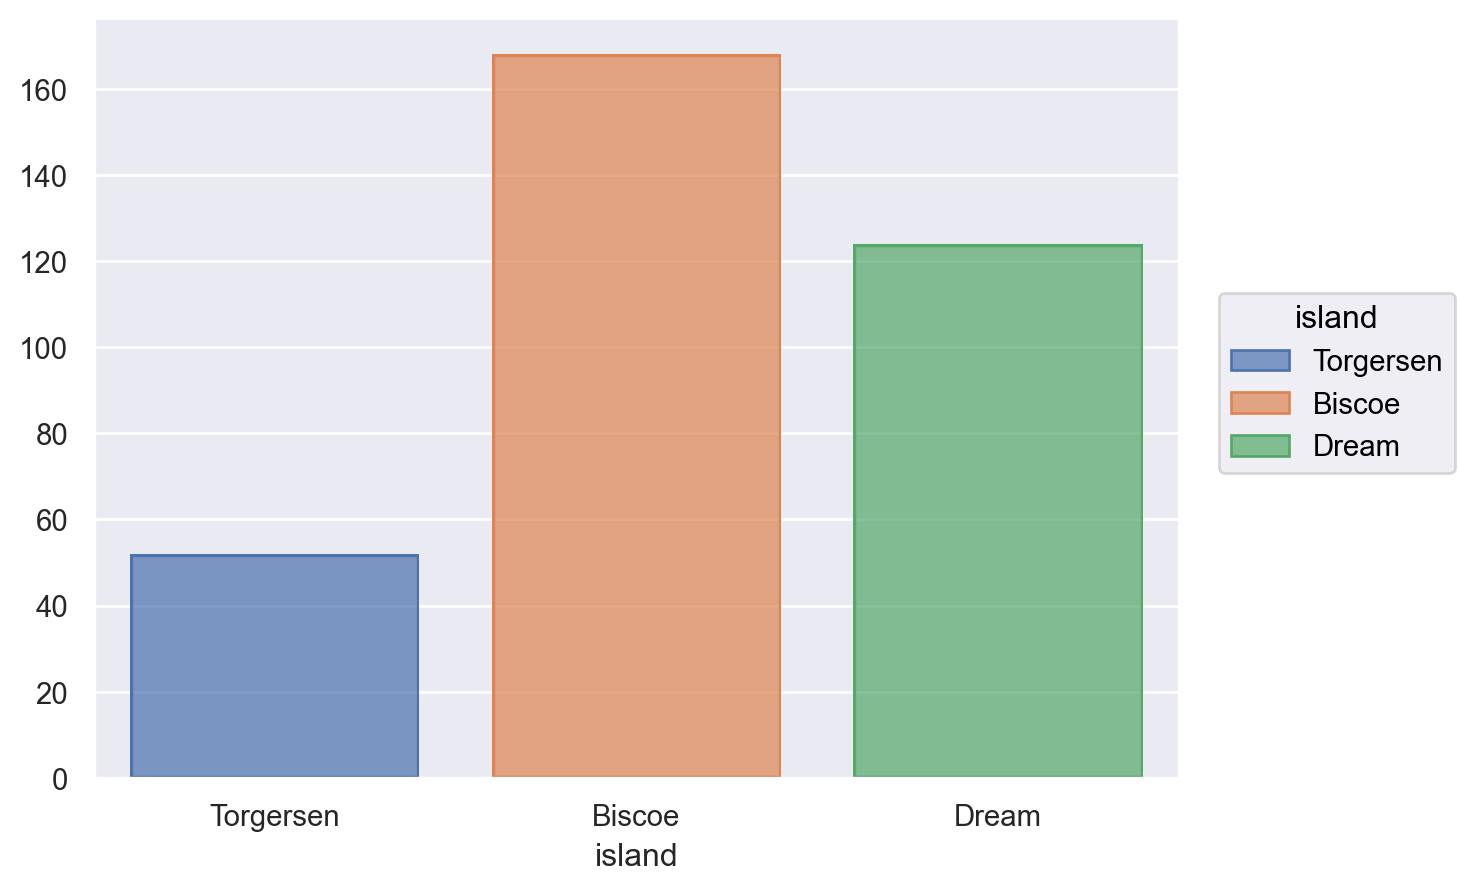

In [48]:
(
    so.Plot(penguins, x = "island", color = "island")
    .add(so.Bar(), so.Hist())
)

 #### d) ¿Por qué no especificamos ninguna variable y en el último gráfico? ###
No especificamos ya que lo que hace la función de histograma es contar cuantas veces se repiten los distintos valores de la variable categórica pasada como parámetro x (en este caso "island")

 #### e) Queremos ver en un gráfico cuántos pinguinos de cada especie hay en cada isla, ¿cómo podemos hacerlo? Si usan un gráfico de barras, pueden utilizar la función dodge() para hacer varias barras por categoría.

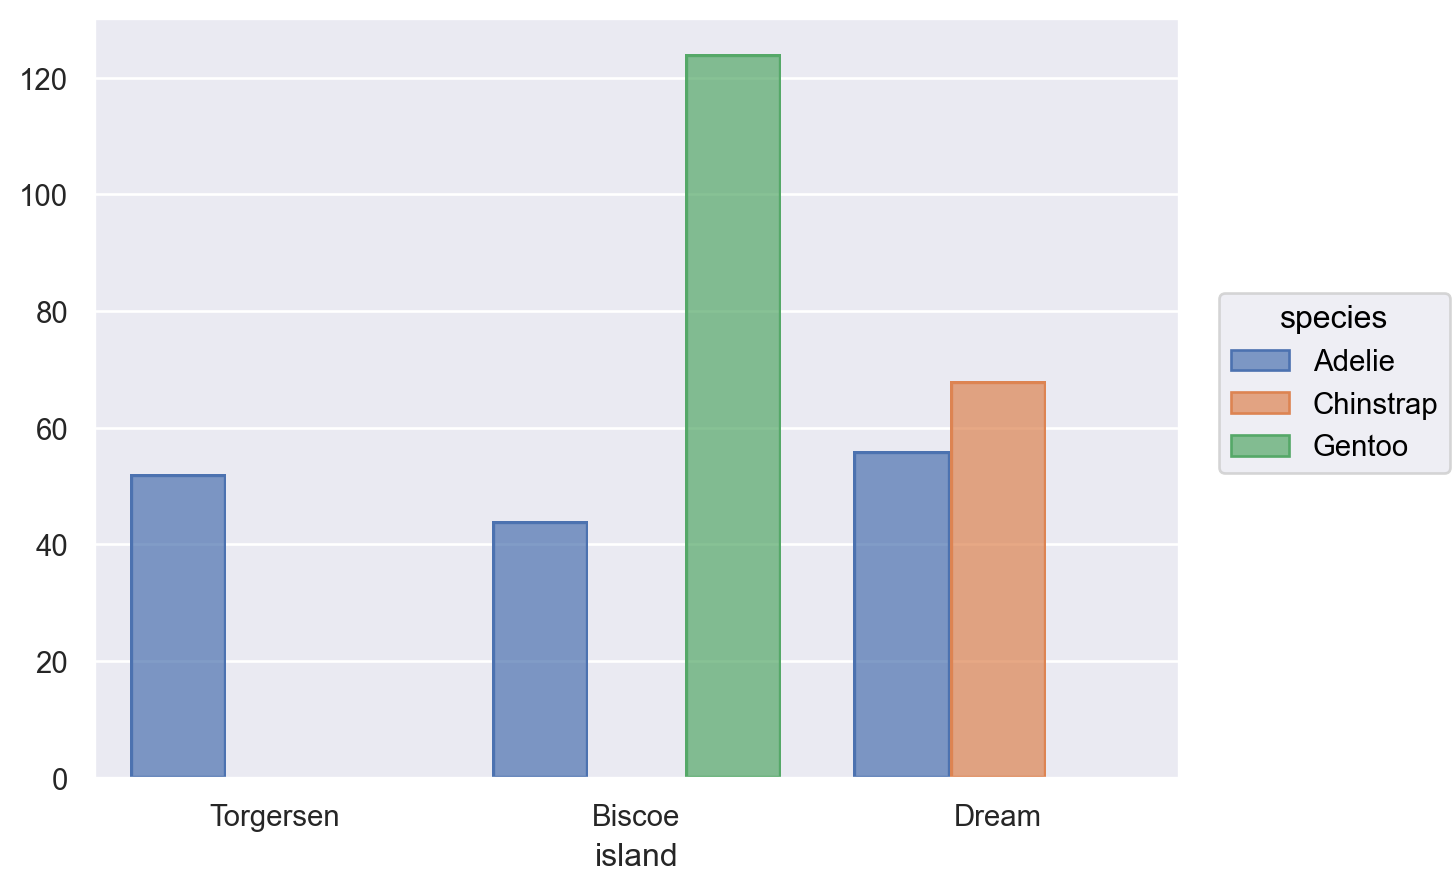

In [52]:
(
    so.Plot(penguins, "island", color = "species")
    .add(so.Bar(), so.Hist(), so.Dodge())
)

#### f) ¿Cómo podrían visualizar lo mismo usando facet()?

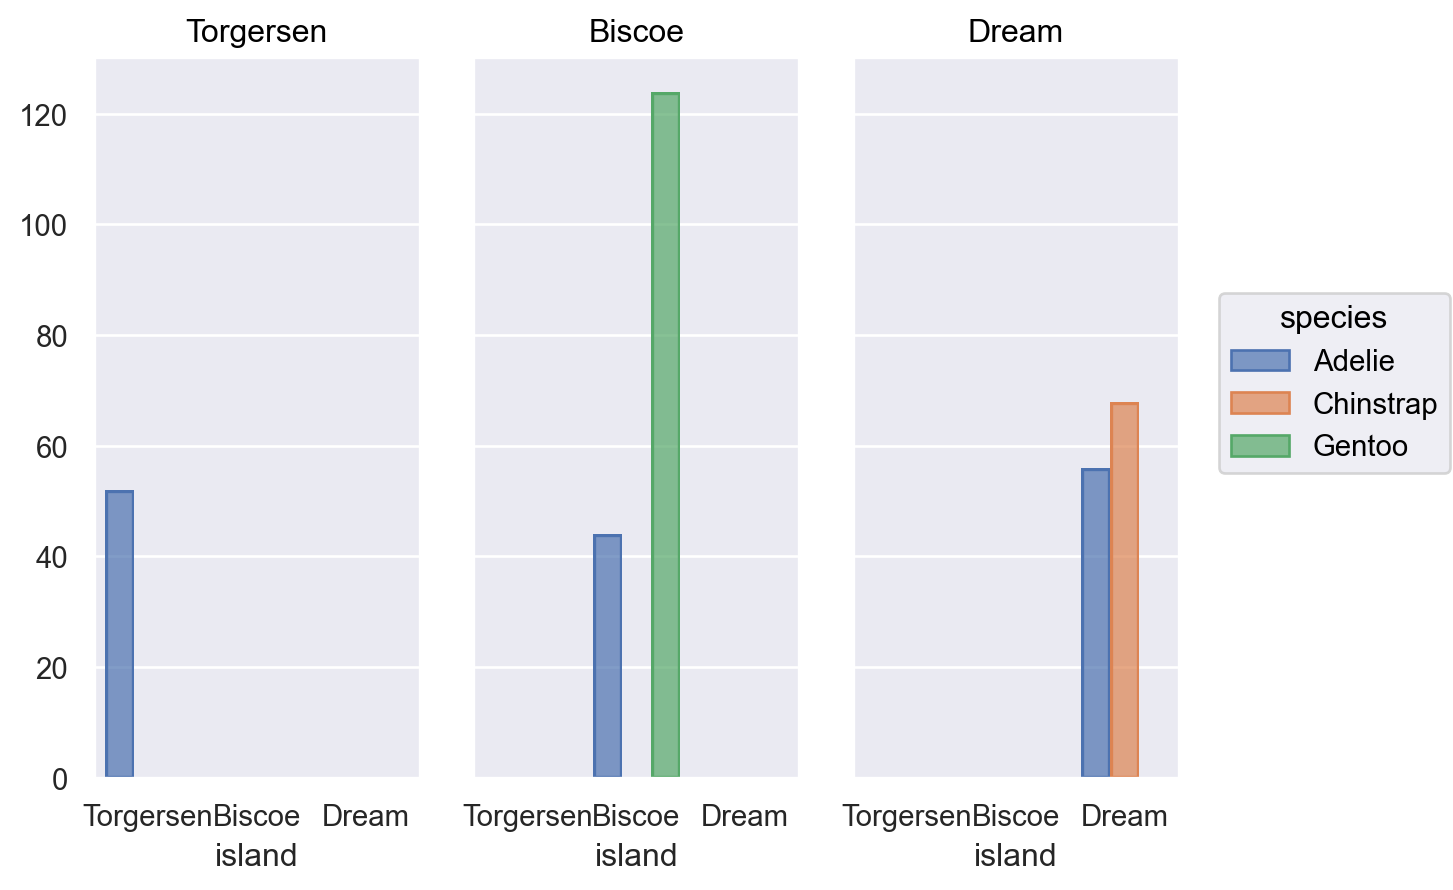

In [61]:
graf = (
    so.Plot(penguins, "island", color="species")
    .add(so.Bar(), so.Hist(), so.Dodge())
)
graf.facet("island", wrap = 3)

#### 9. Realizar un histograma de la cantidad de pinguinos en función del tamaño del ala (variable= flipper_length_mm). A partir del gráfico, estimar el valor mínimo, máximo, la media y la mediana. Verificar sus estimaciones utilizando los comandos apropiados.

In [62]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


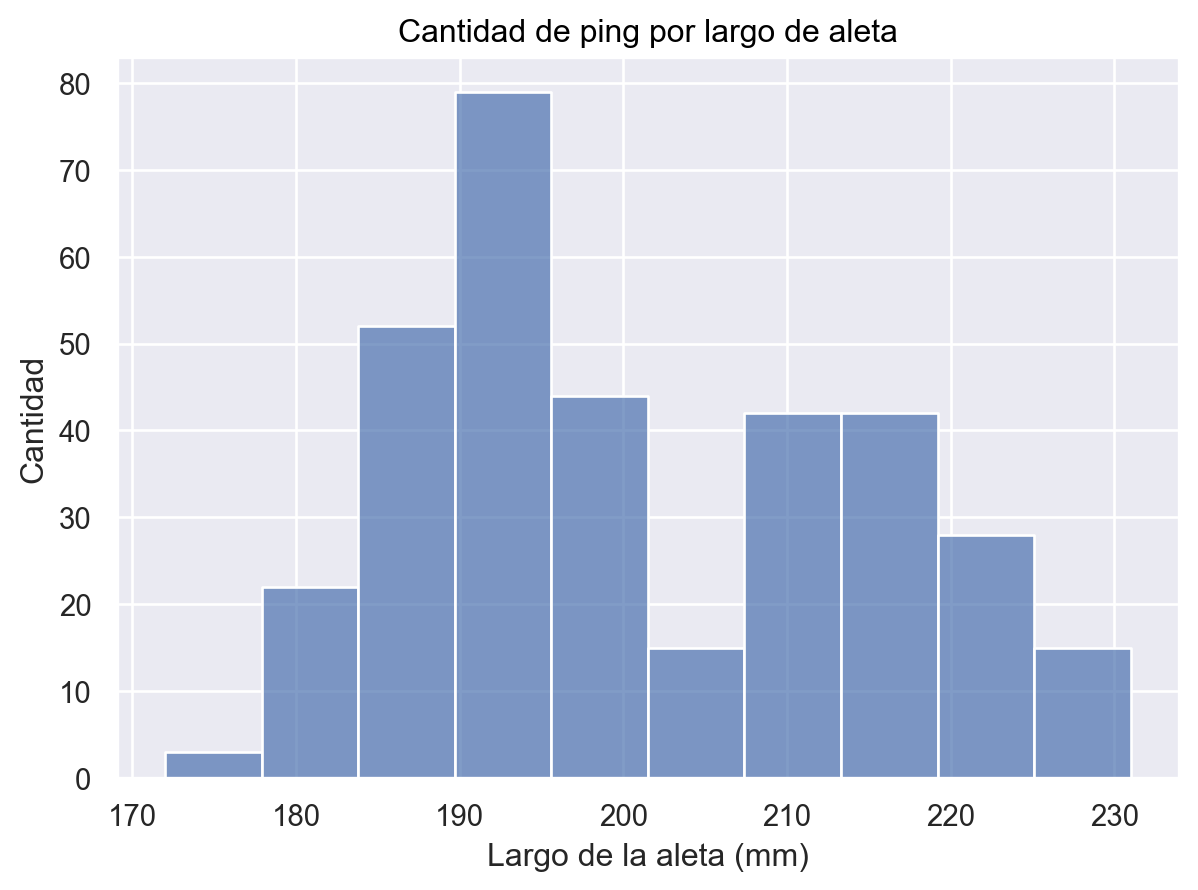

In [219]:
(
    so.Plot(penguins, x = "flipper_length_mm")
    .add(so.Bars(), so.Hist())
).label(x="Largo de la aleta (mm)", y = "Cantidad", title="Cantidad de ping por largo de aleta")

El valor minimo parece ser 172 y el máximo 232 aproximadamente. Media alrededor de 200 y la mediana 195

In [72]:
media = penguins["flipper_length_mm"].mean()
mediana = penguins["flipper_length_mm"].median()
print(f"La media es de {media} mientras que la mediana toma un valor de {mediana}")

La media es de 200.91520467836258 mientras que la mediana toma un valor de 197.0


Podemos observar que los datos obtenidos con las funciones fueron similares a los que habían sido estimados mediante la mera observación del gráfico.

In [103]:
cantAletas_197 = penguins.groupby("flipper_length_mm").size().get(197,0)
moda = penguins.mode()["flipper_length_mm"]
print(moda)
print(f" La cantidad de pinguinos con aletas de 197cm es : {cantAletas_197}")
#print(f"La longitud que más se repite es: ", {penguins.mode(axis='columns')})

0    190.0
Name: flipper_length_mm, dtype: float64
 La cantidad de pinguinos con aletas de 197cm es : 10


In [86]:
penguins["flipper_length_mm"].value_counts().max()

22

#### 10. (a) Hacer un scatterplot de bill_depth_mm (en el eje y) vs. bill_length_mm (en el eje x).

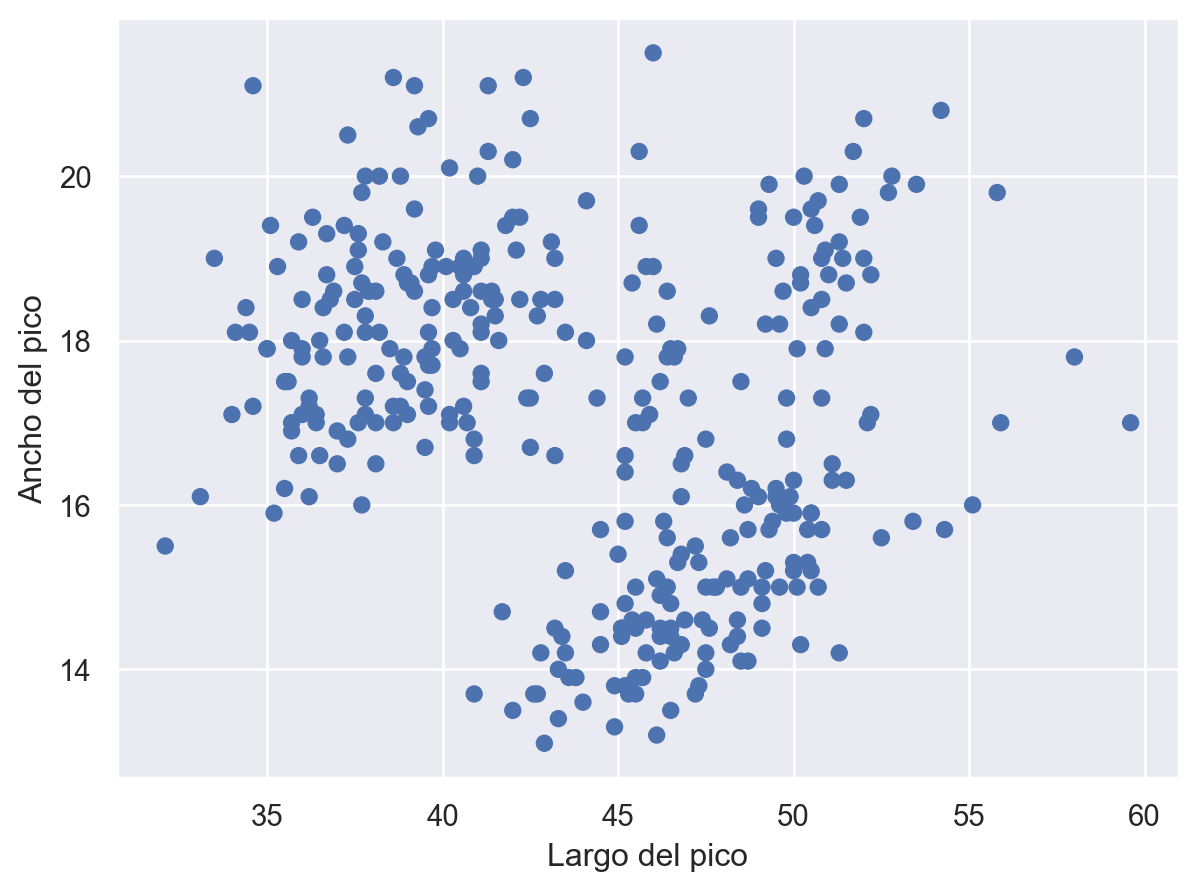

In [221]:
(
    so.Plot(penguins, penguins["bill_length_mm"], penguins["bill_depth_mm"])
    .add(so.Dot())
).label(x="Largo del pico", y = "Profundidad del pico")

#### 11. Calcular distintos estadísticos de la variable bill_depth_mm (mínimo, máximo, media, ...).

In [158]:
bill_depth_prom = penguins["bill_depth_mm"].mean().round()
bill_depth_mediana = penguins["bill_depth_mm"].median()
bill_depth_moda = penguins.mode()["bill_depth_mm"]
print(f"El promedio es: {bill_depth_prom} , la mediana es:{bill_depth_mediana} y la moda: {bill_depth_moda[0]}. Todo medido en mm")

El promedio es: 17.0 , la mediana es:17.3 y la moda: 17.0. Todo medido en mm


In [127]:
bill_depth_var = penguins["bill_depth_mm"].var()
bill_depth_std = penguins["bill_depth_mm"].std()
print(bill_depth_std, bill_depth_var)

1.9747931568167816 3.8998080122103893


#### b) Según lo observado en el ejercicio anterior, ¿esos valores varían según la especie? ¿Cómo podemos usar gráficos BoxPlot para para ver la relación entre species y bill_depth_mm?

In [146]:
depth_species = pd.DataFrame(penguins.groupby("species")["bill_depth_mm"].mean())
display(depth_species)
depth_species.info()

,bill_depth_mm
species,
Adelie,18.346358
Chinstrap,18.420588
Gentoo,14.982114


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Adelie to Gentoo
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bill_depth_mm  3 non-null      float64
dtypes: float64(1)
memory usage: 48.0+ bytes


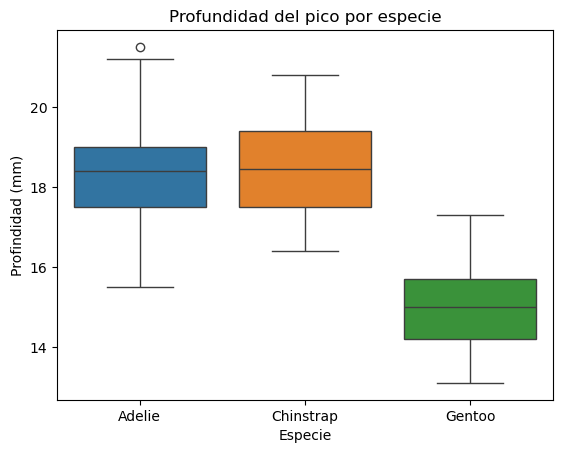

In [229]:
graf = sns.boxplot(x = penguins["species"], y=penguins["bill_depth_mm"], hue =penguins["species"])
graf.set(title="Profundidad del pico por especie",xlabel="Especie",ylabel="Profindidad (mm)")
plt.show()

#### 12a) Rehacer el scatter plot del ejercicio 10, coloreando los puntos según el sexo. ¿Qué se observa?

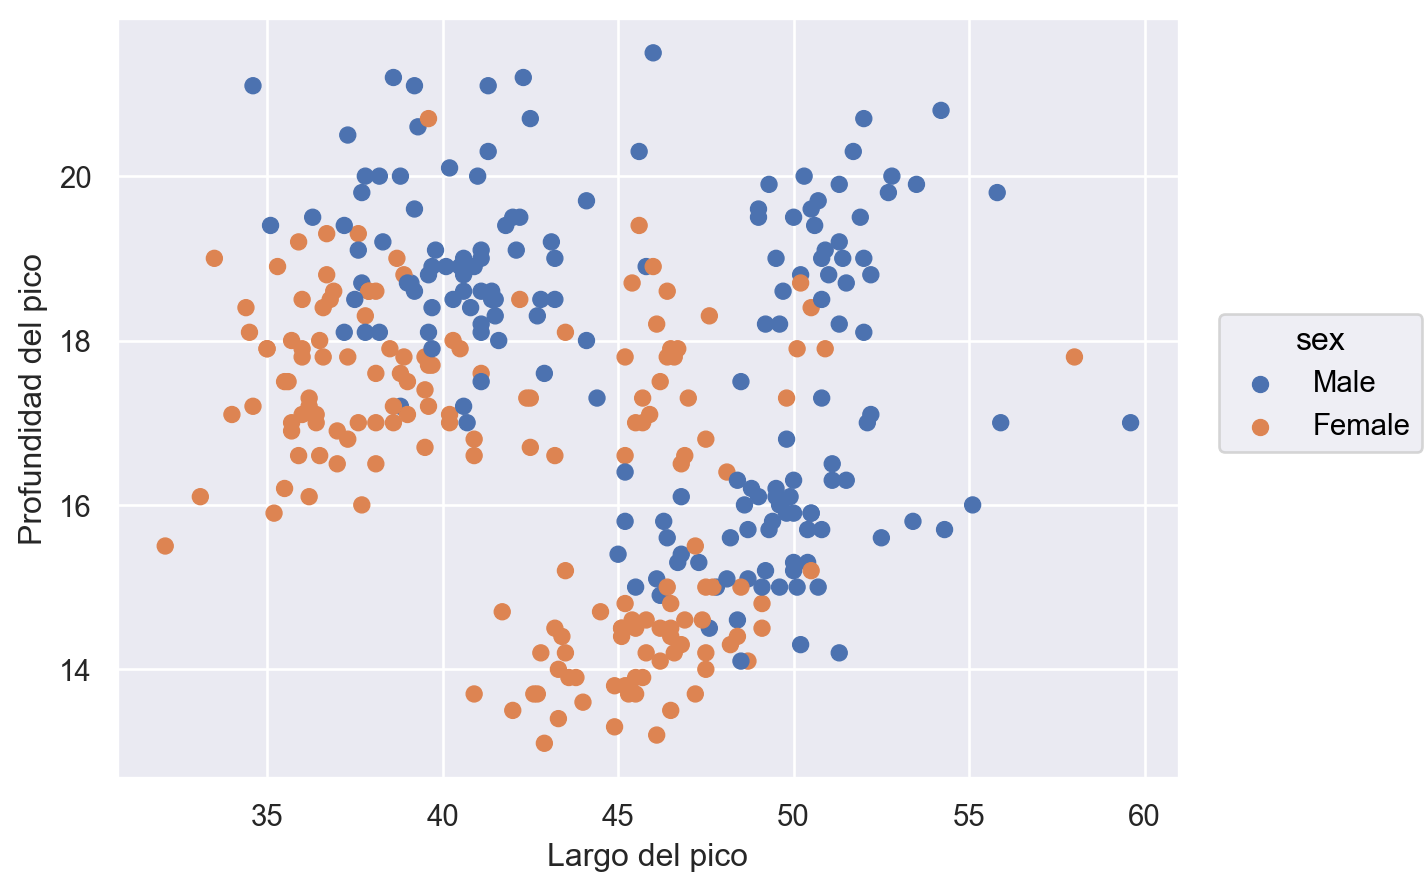

In [226]:
(
    so.Plot(penguins, penguins["bill_length_mm"],penguins["bill_depth_mm"], color = penguins["sex"])
    .add(so.Dot())
).label(x="Largo del pico", y = "Profundidad del pico")

Pareciera haber tres nubes distintas de datos, para cada una, los picos de las hembras parecen menos largos y profundos que los de los machos. Asimismo, suponiendo que las nubes se deben a distintas especies, la especie del medio pareciera que las hembras tienen el pico más profundo que todos los individuos de la especie con menor tamaño de picos. Voy a ponerle distinta forma a los gráficos para ver si esto es así (se diferencian las nubes por especie)

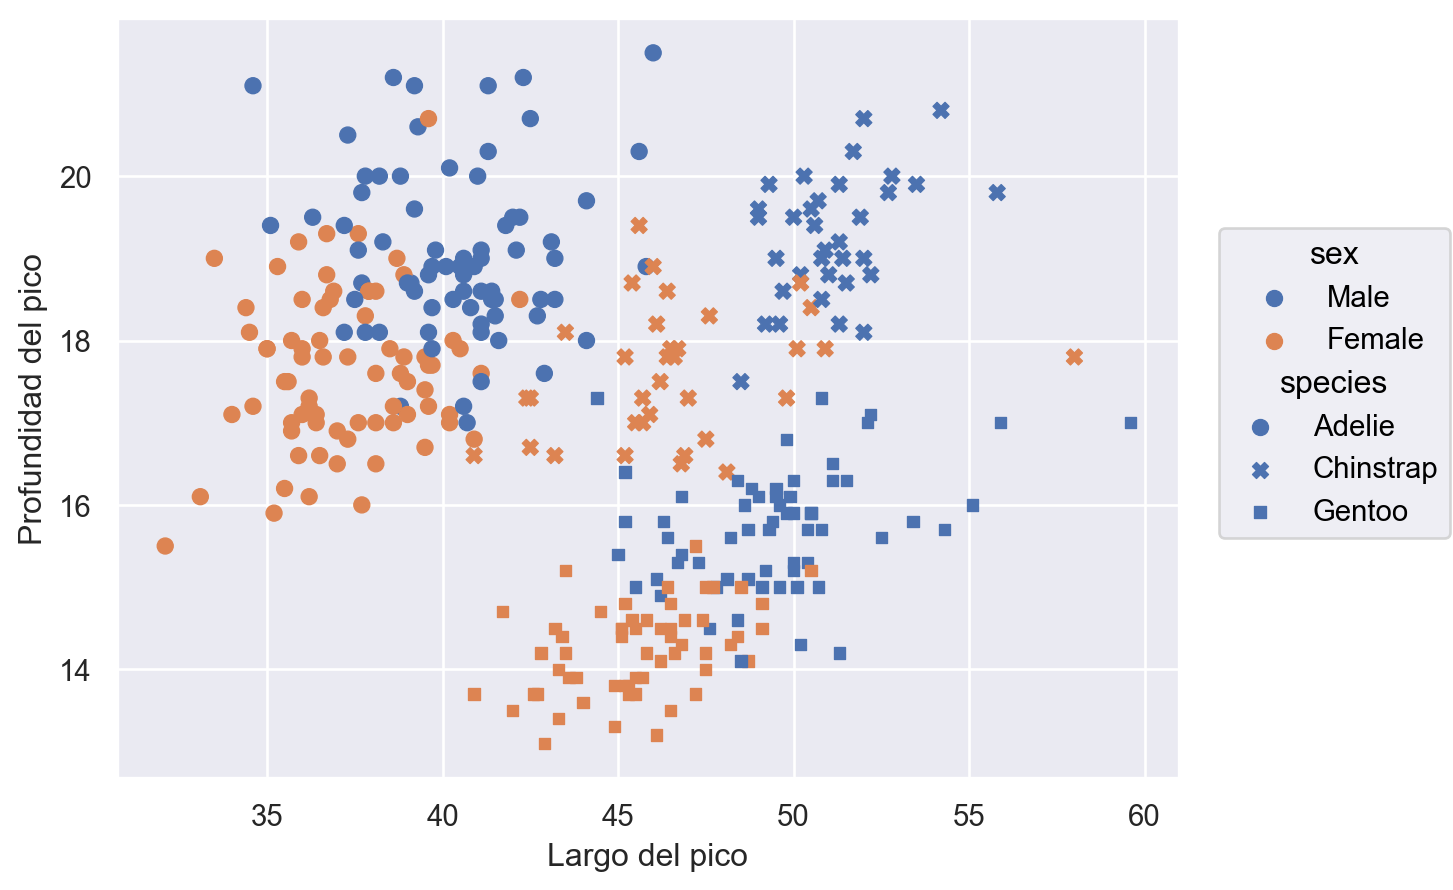

In [227]:
(
    so.Plot(penguins, penguins["bill_length_mm"],penguins["bill_depth_mm"], color = penguins["sex"], marker = penguins["species"])
    .add(so.Dot())
).label(x="Largo del pico", y = "Profundidad del pico")

Efectivamente, eran tres nubes donde se ve que Adelie tiene medidas similares de profundidad que los Chinstrap, aunque estos últimos tienen mayor longitud. Ambas especies tienen largos y anchos de pico considerablemente mayores a la especie Gentoo.

#### b) Usando la función facet() separar el gráfico del item anterior en tres subgráficos, uno para cada especie.

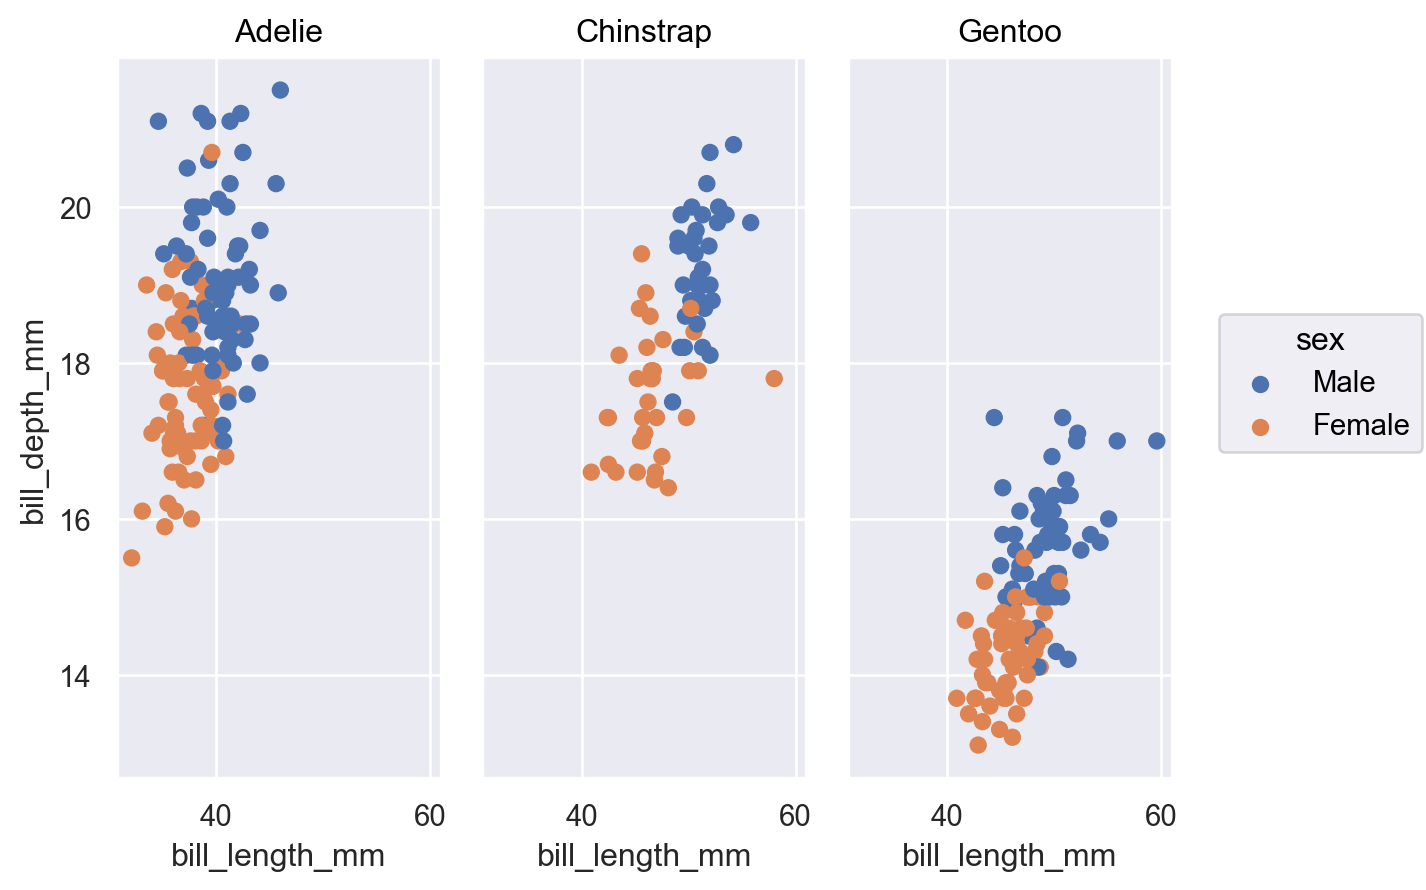

In [166]:
picos_x_sexo = (
    so.Plot(penguins, penguins["bill_length_mm"],penguins["bill_depth_mm"], color = penguins["sex"])
    .add(so.Dot())
)
picos_x_sexo.facet(penguins["species"])

#### 13a) Rehacer el scatter plot del ejercicio 10, modificando el tamaño de los puntos según el peso de cada pingüino, utilizando el parámetro pointsize="???". ¿Qué se observa?

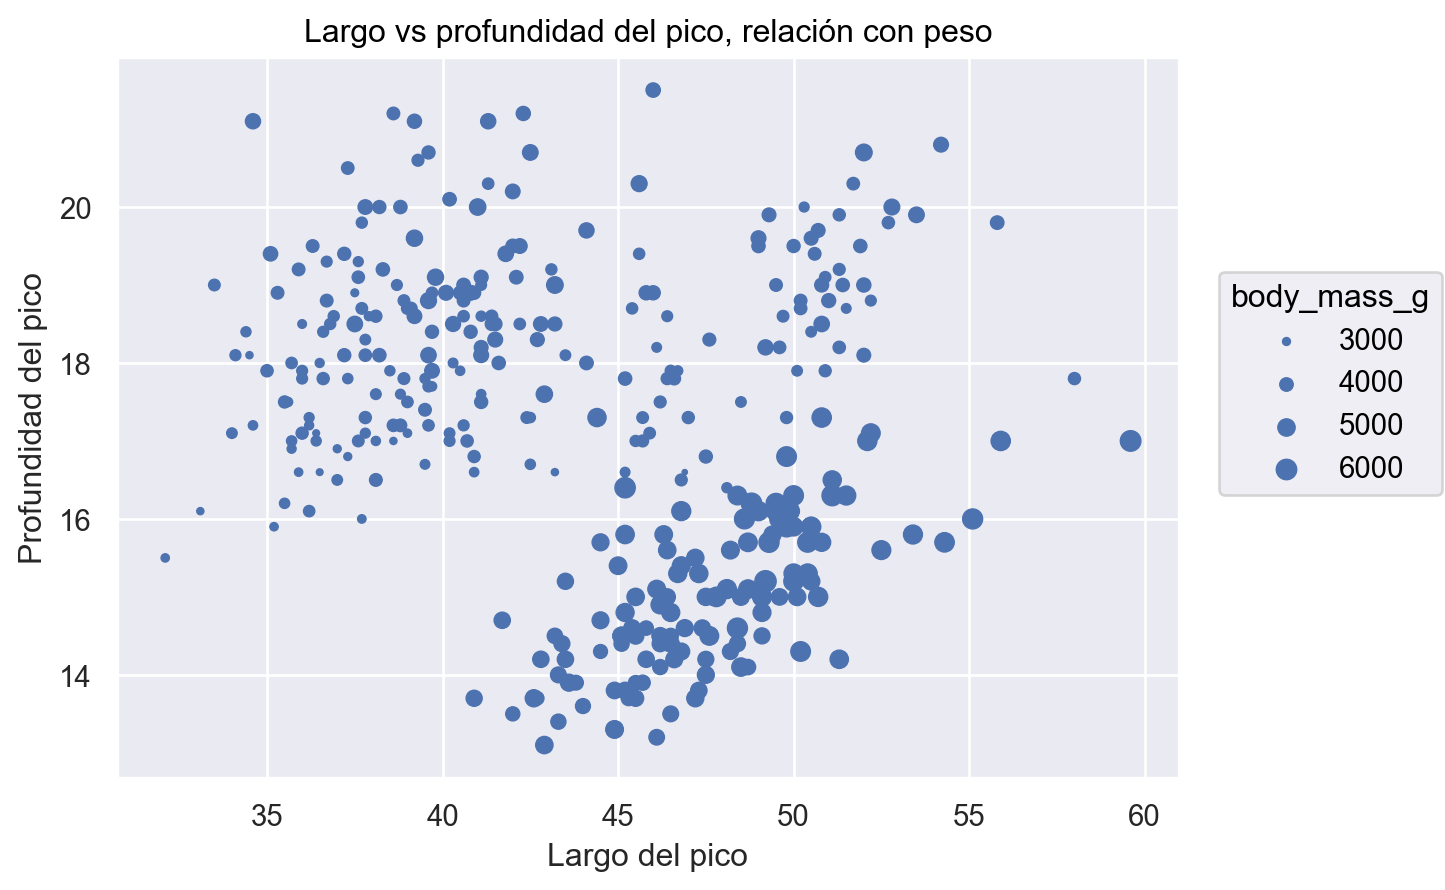

In [230]:
(
    so.Plot(penguins, penguins["bill_length_mm"],penguins["bill_depth_mm"], pointsize = "body_mass_g")
    .add(so.Dot())
).label(x="Largo del pico", y = "Profundidad del pico",title ="Largo vs profundidad del pico, relación con peso")

Pareciera ser que los pingüinos de mayor peso son los que tienen pico menos largo y ancho, los de la especie Gentoo

#### b) En base a lo observado, ¿cuál es la especie con mayor peso? Verificarlo mediante alguna visualización.

Pareciera ser la Gentoo, lo grafico para ver si se puede observar

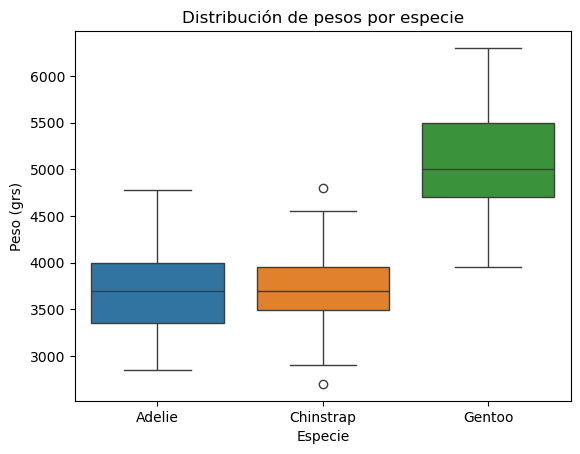

In [184]:
box_peso = sns.boxplot(penguins,x=penguins["species"],y=penguins["body_mass_g"], hue = "species")
box_peso.set(xlabel = "Especie", ylabel = "Peso (grs)", title = "Distribución de pesos por especie")
plt.show()